### Sharpe Ratio Project

The Sharpe Ratio compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.

Let us use the Sharpe Ratio by calculating it for two stocks; Facebook and Amazon. As a benchmark we can use the S&P 500, which measures the performance of the 500 largest stocks in the US. When we use a stock index instead of the risk-free rate, the result is called the Information Ratio and is used to benchmark the return on active portfolio management because it tells you how much more return for a given unit of risk your portfolio manager earned relative to just putting your money into a low-cost index fund.

### Importing and Cleaning the Data

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Plot settings
plt.style.use('fivethirtyeight')
%matplotlib inline

#Reading in the data (Facebook + Amazon & S&P 500)
    #Set Date column to datetime64 and move to index. Also drop NA values
stock_data = pd.read_csv('stock_data.csv', parse_dates = ['Date'], index_col=['Date']).dropna()
benchmark_data = pd.read_csv('benchmark_data.csv', parse_dates = ['Date'], index_col=['Date']).dropna()



### Taking a Glance at the Data

Before performing an investment analysis on the data, let's first visualize the data to better understand the information we have

In [2]:
#Visualizing the stock data
stock_data.info()

print('\n')

benchmark_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


From the above we can see we are dealing with 252 loat values for each of our columns across the dataframes. These represent the price of the stock (identified by the column name) on a given day (the index).

Next, let's visualize how each changes over time.

##### Amazon and Facebook:


,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


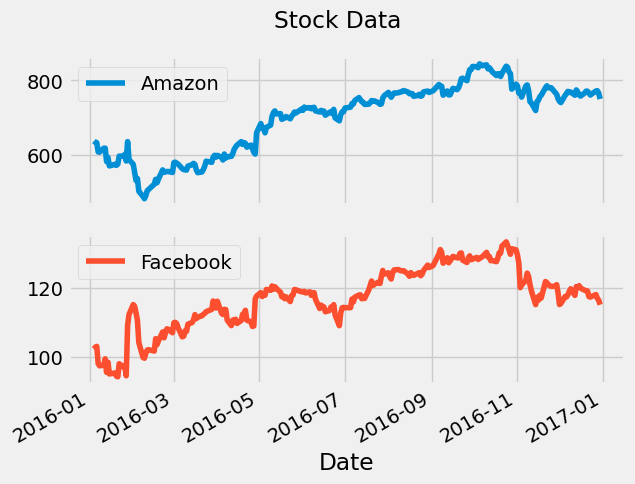

In [3]:
#Visualizing the Stock Data
stock_data.plot(subplots=True, title='Stock Data');

#Stock data info
stock_data.describe()

##### S&P 500:


,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


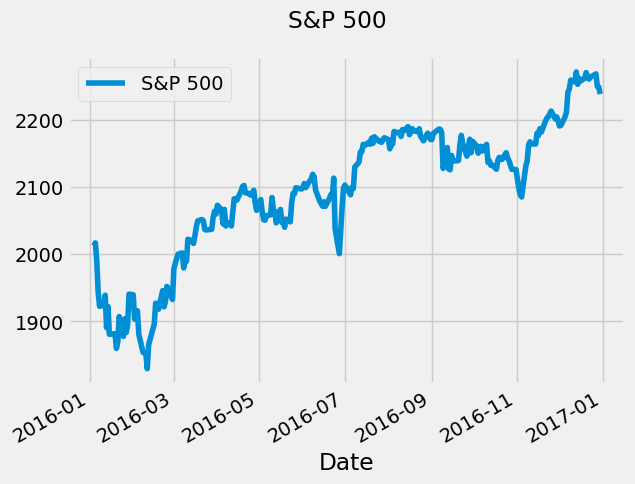

In [4]:
#Visualizing the Benchmark Data
benchmark_data.plot(subplots=True, title='S&P 500');

#Benchmark data info
benchmark_data.describe()

### Sharpe Ratio Inputs: Daily Stock Returns

The Sharpe ratio is calculated using the difference in returns across different investment opportunities. 

Since our data shows the daily price of the stock - not the return - we can find the return by calculating the percentage change in value between each day. Our summary statistics will also be used in calculating the Sharpe Ratio.

#### Facebook and Amazon Daily Returns

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


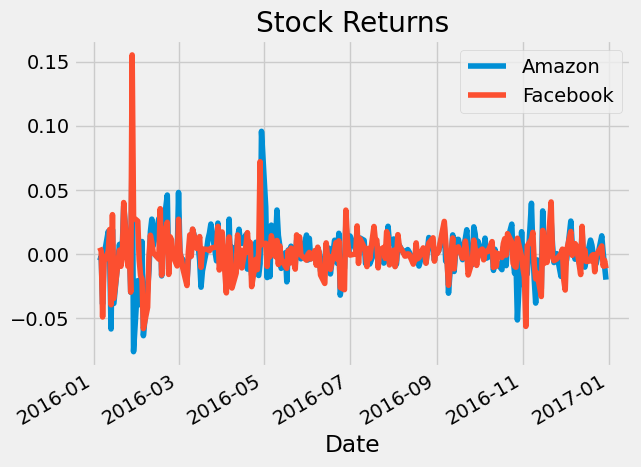

In [5]:
#Calculating daily stock_data returns
stock_returns = stock_data.pct_change()

#Daily returns plot
stock_returns.plot(title='Stock Returns');

#Daily returns info
stock_returns.describe()

#### S&P 500 Daily Returns

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

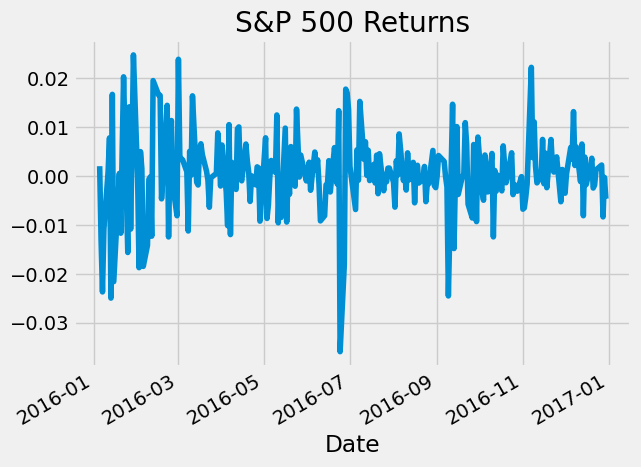

In [6]:
#Calculating daily S&P returns
benchmark_returns = benchmark_data['S&P 500'].pct_change()

#Daily returns plot
benchmark_returns.plot(title='S&P 500 Returns');

#Daily returns info
benchmark_returns.describe()

#### Excess Returns
Excess returns of our chosen stocks versus the benchmark can be calculated by taking the difference of the daily returns between Facebook/Amazon and the S&P 500.

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


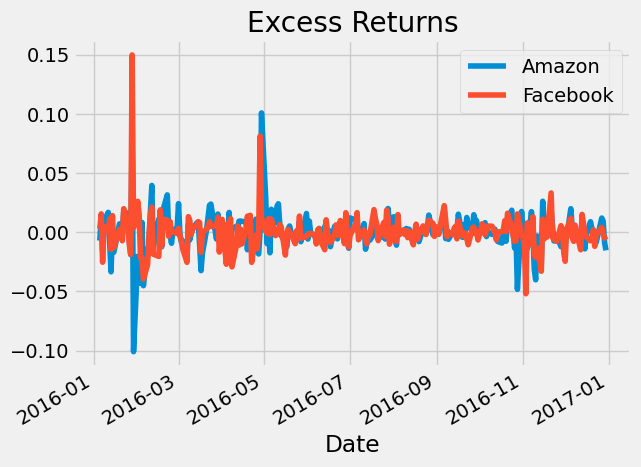

In [7]:
#Excess returns calculaton
excess_returns = stock_returns.sub(benchmark_returns, axis=0)

#Excess returns plot
excess_returns.plot(title='Excess Returns');

#Excess returns info
excess_returns.describe()

### Calculating the Sharpe Ratio

Having found our inputs we can now begin calculating the Sharpe Ratio. To do this we will calculate the average and the standard deviation of the excess returns. The average will tell us how much more/less the stock yields per day relative to the benchmark. The standard deviation tells us the relative implied risk compared to the benchmark

<AxesSubplot: title={'center': 'Average Excess Return'}>

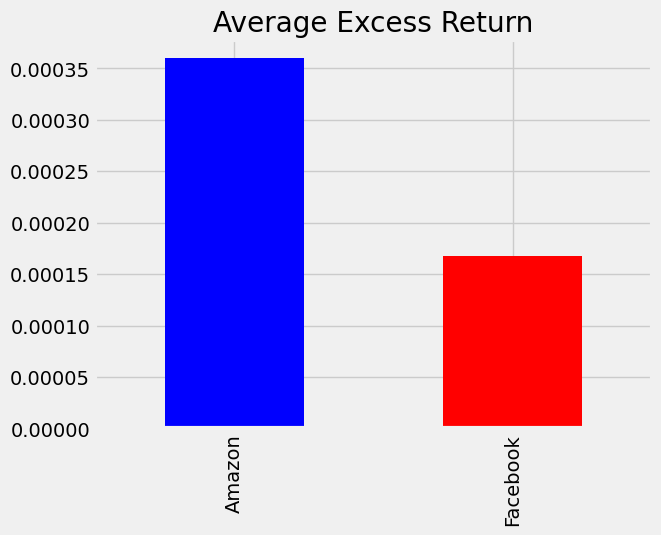

In [8]:
#Calculate the average excess return
avg_excess_return = excess_returns.mean()

#Plot of average excess return
avg_excess_return.plot.bar(title='Average Excess Return', color=['blue', 'red'])

<AxesSubplot: title={'center': 'Standard Deviation of Excess Rerturn'}>

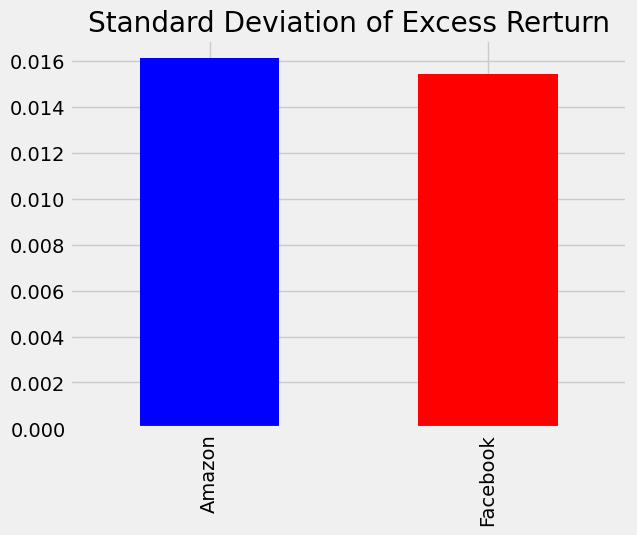

In [9]:
#Calculate standard deviation of excess return
sd_excess_return = excess_returns.std()

#plot of standard deviation of excess return
sd_excess_return.plot.bar(title='Standard Deviation of Excess Rerturn', color=['blue', 'red'])

#### Sharpe Ratio 

Recall the Sharpe Ratio indicates how much more/less of a return an investment oppurtunity yields per unit of risk.

The Sharpe Rato is frequently annualized by multiplying it by the square root of the number of periods. Since we used daily data, we will use the square root of the number of days (252).

<AxesSubplot: title={'center': 'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

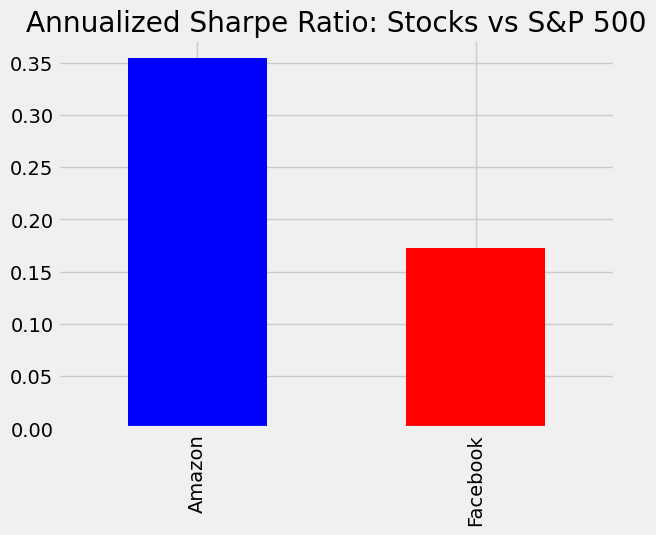

In [10]:
#Calculaing the daily Sharpe Ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

#Annualizing the Sharpe Ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

#Annualized Sharpe Ratio Plot
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500', color=['blue', 'red'])


### Results

Our results show Amazon has a higher Sharpe ratio, making it a much more appealing investment during that time. This is because it offered a greater reward per unit of risk assumed. 

The difference in Sharpe Ratio was primarily driven by differences in return - not risk. We know this because the risk (measured by stanard deviation) was only slightly higher for Amazon than Facebook. 

The Sharpe ratio can be especially helpful in comparing stock that offer different returns and risks - allowing them to be more easily compared.